## Below scripts checks an ANOVA test to compare the page load time when F-PKI was used and when it was not

Country: Austria
ANOVA F-value: 12.703151040742144
ANOVA P-value: 0.0004908744503637312
--------------------
Country: Belgium
ANOVA F-value: 4.239483487752223
ANOVA P-value: 0.04129598889851344
--------------------
Country: Bosnia_And_Herzegovina
ANOVA F-value: 5.009995265126787
ANOVA P-value: 0.02673581350689902
--------------------
Country: Canada
ANOVA F-value: 8.11666325376242
ANOVA P-value: 0.005118508738502592
--------------------
Country: Chile
ANOVA F-value: 5.860547914417036
ANOVA P-value: 0.017167181871970794
--------------------
Country: Colombia
ANOVA F-value: 4.974706954516013
ANOVA P-value: 0.02740916155236079
--------------------
Country: Costa_Rica
ANOVA F-value: 8.505197444670706
ANOVA P-value: 0.004193612921135068
--------------------
Country: Croatia
ANOVA F-value: 5.21705174869974
ANOVA P-value: 0.02377919193405393
--------------------
Country: Cyprus
ANOVA F-value: 4.306262876832243
ANOVA P-value: 0.03968005299430561
--------------------
Country: Denmark
ANOVA F-va

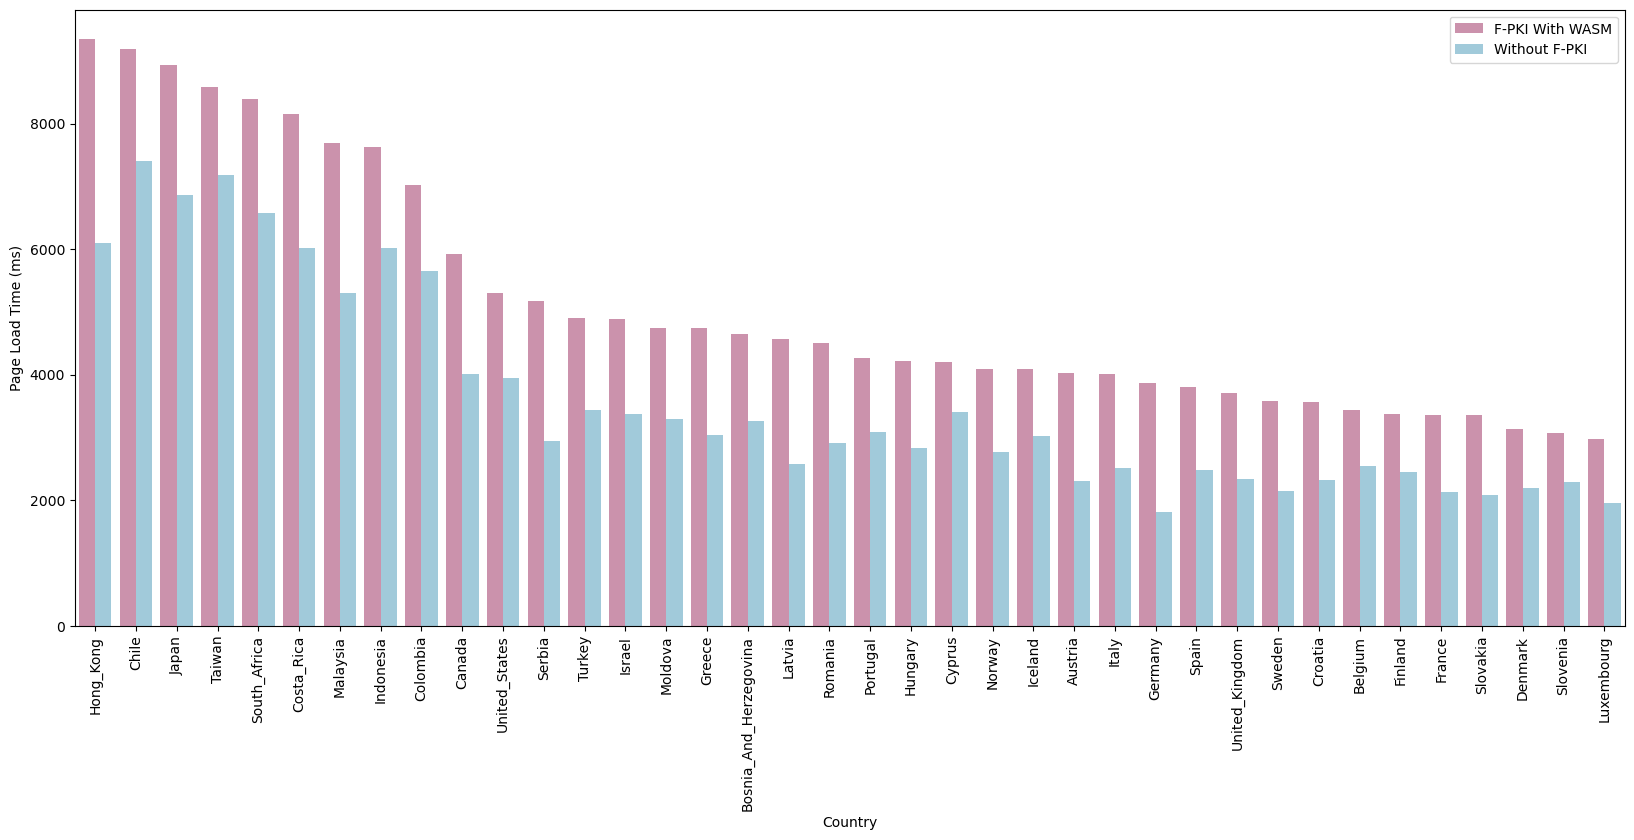

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df1_cleaned = pd.read_csv('new_first_phase_anova.csv')
df3_cleaned = pd.read_csv('new_third_phase_anova.csv')

df1_cleaned = df1_cleaned.dropna(subset=['Page Load Time_x'])
df3_cleaned = df3_cleaned.dropna(subset=['Page Load Time'])

df1_grouped = df1_cleaned.groupby('Country')['Page Load Time_x']
df3_grouped = df3_cleaned.groupby('Country')['Page Load Time']

countries = df1_cleaned['Country'].unique()

anova_results = {}
for country in countries:
    if country in df1_grouped.groups and country in df3_grouped.groups:
        fvalue, pvalue = stats.f_oneway(df1_grouped.get_group(country), df3_grouped.get_group(country))
        if pvalue < 0.05:
            anova_results[country] = {'F-value': fvalue, 'P-value': pvalue}
            print(f"Country: {country}")
            print(f"ANOVA F-value: {fvalue}")
            print(f"ANOVA P-value: {pvalue}")
            print("--------------------")

significant_countries = list(anova_results.keys())
significant_df = pd.DataFrame({'Country': significant_countries})
significant_df = significant_df.merge(df1_grouped.mean().reset_index(), left_on='Country', right_on='Country', suffixes=('_F-PKI', '_F-PKI With WASM'))
significant_df = significant_df.merge(df3_grouped.mean().reset_index(), left_on='Country', right_on='Country', suffixes=('_F-PKI', '_Without F-PKI With WASM'))
significant_df.rename(columns={'Page Load Time_x': 'Page Load Time_F-PKI', 'Page Load Time': 'Page Load Time_Without F-PKI With WASM'}, inplace=True)
significant_df = significant_df.sort_values(by='Page Load Time_F-PKI', ascending=False)

melted_df = pd.melt(significant_df, id_vars='Country', value_vars=['Page Load Time_F-PKI', 'Page Load Time_Without F-PKI With WASM'])
melted_df[''] = ['F-PKI With WASM'] * len(significant_df) + ['Without F-PKI'] * len(significant_df)

colors = ['#D588AB', '#98CEE3']  

plt.figure(figsize=(20, 8))
sns.barplot(
    data=melted_df,
    x='Country',
    y='value',
    hue='',
    palette=colors
)

plt.xlabel('Country')
plt.ylabel('Page Load Time (ms)')
plt.legend(title='')
plt.xticks(rotation=90)
#plt.savefig("ANOVA.png", dpi=300, bbox_inches='tight') 
plt.show()


### This statistical tests results are based entirely on the sample data that we collected and analyzed when determining statistical significance or non-significance.